# Homework 4: Solutions


<br>

**Conceptual:** Short answer questions. Be concise.

---
1. Consider the problem of classifying a binary response variable (i.e., $y \in \{1,0\}$). If there is no overlap in the values of X when y = 1 and when y=0,  such that there is a large “gap” between the two distributions of X values, then this is problematic for one of the classifiers discussed in class and the text. What classifier does this situation pose a problem for? Explain conceptually why this is a problem and compare it with another classifier approach that does not suffer this limitation.

**Answer:**

When classes of outcomes are well-separated, the parameter estimates for the logistic regression model become unstable. Linear discriminant analysis utilizes Baye's theorem for classification and does not suffer from the same problem. 

The reason for this is as the data move further apart and there is greater separation, the objective function changes drastically. At the extreme example, when there is perfect separation, this is known as the Hauck-Donner phenonmenon, so named for their paper (1977, JASA, 72:851-853).

Note to self, can use 'safeBinaryRegression' to fix this problem in R by identifiying separation.

---
2. Compare logistic regression, LDA, and kNN classification approaches. Which are parametric which are non-parametric? For parametric models what functions do they assume? For non-parametric methods, how do the classifiers separate groups? How is the flexibility/bias tradeoff adjusted for each method?




**Answer:** 

Logistic regression = supervised parametric
Linear Discriminant Analysis = unsupervised parametric
KNN = unsupervised nomnparametric

The parametric models assume linearity, independence of errors, no multicollinearity, and a binary (or higher) response, in the case of logistic regression.

LDA assumes that the predictor variables are drawn from a multivariate normal distribution, homogeneity of variance and covariance, no multicollinearity, and independence of errors.

KNN classifier separates groups by asking what the class (for a binary outcome, this would be class A or B) and ask the $k$ closest points what class of the outcome $y$ they belong to. Essentially makes a decision based on consensus.

---
3. What is the curse of dimensionality? Why is it especially problematic for kNN classification (i.e., why does kNN fail in high dimensional contexts)?


**Answer:**

The curse of dimensionality is when the ratio of $p$ predictors approaches or gets larger than $n$ observations. Thus, if the ratio of $(p/n)$ is too high.

If you increase the predictor variables to be higher than the number of observations, then eventually you reach a problem where a particular observation does not have enough neighbors. The mean squared error increases because a given new observation may be assigned to the test observation that is actually quite far away. Since MSE is so high, you can say that KNN is a poor fit.
Parametric methods will outperform nonparametric when there are a small number of observations per predictor.

---
4. Suppose that we take a data set, divide it into equally-sized training and test sets, and then try out two different classification procedures. First we use logistic regression and get an error rate of 20% on the training data and 30% on the test data. Next we use 1-nearest neighbors (i.e. K = 1) and get an average error rate (averaged over both test and training data sets) of 18%. Based on these results, which method should we prefer to use for classification of new observations? Why?

**Answer:** 
* For KNN with K=1, the training error rate is 0% because for any training observation, its nearest neighbor will be the response itself. So, that means that KNN has a test error rate of 36%. Thus logistic regression is preferred because of its lower test error rate of only 30%.

---
**Applied:** Show your code & plots
(Exercises 4.10 and 4.11 from ISLR.)

---

5. This question should be answered using the Weekly data set, which is part of the ISLR package. This data is similar in nature to the Smarket data from this chapter’s lab, except that it contains 1,089 weekly returns for 21 years, from the beginning of 1990 to the end of 2010.

(a) Produce some numerical and graphical summaries of the Weekly data. Do there appear to be any patterns?

(b) Use the full data set to perform a logistic regression with Direction as the response and the five lag variables plus Volume as predictors. Use the summary function to print the results. Do any of the predictors appear to be statistically significant? If so, which ones?

(c) Compute the confusion matrix and overall fraction of correct predictions. Explain what the confusion matrix is telling you about the types of mistakes made by logistic regression.

(d) Now fit the logistic regression model using a training data period from 1990 to 2008, with Lag2 as the only predictor. Compute the confusion matrix and the overall fraction of correct predictions for the held out data (that is, the data from 2009 and 2010).

(e) Repeat (d) using LDA.

(f) Repeat (d) using QDA.

(g) Repeat (d) using KNN with K = 1.

(h) Which of these methods appears to provide the best results on
this data?

(i) Experiment with different combinations of predictors, includ- ing possible transformations and interactions, for each of the methods. Report the variables, method, and associated confu- sion matrix that appears to provide the best results on the held out data. Note that you should also experiment with values for K in the KNN classifier.

In [2]:
library(ISLR)

In [3]:
summary(Weekly)

      Year           Lag1               Lag2               Lag3         
 Min.   :1990   Min.   :-18.1950   Min.   :-18.1950   Min.   :-18.1950  
 1st Qu.:1995   1st Qu.: -1.1540   1st Qu.: -1.1540   1st Qu.: -1.1580  
 Median :2000   Median :  0.2410   Median :  0.2410   Median :  0.2410  
 Mean   :2000   Mean   :  0.1506   Mean   :  0.1511   Mean   :  0.1472  
 3rd Qu.:2005   3rd Qu.:  1.4050   3rd Qu.:  1.4090   3rd Qu.:  1.4090  
 Max.   :2010   Max.   : 12.0260   Max.   : 12.0260   Max.   : 12.0260  
      Lag4               Lag5              Volume            Today         
 Min.   :-18.1950   Min.   :-18.1950   Min.   :0.08747   Min.   :-18.1950  
 1st Qu.: -1.1580   1st Qu.: -1.1660   1st Qu.:0.33202   1st Qu.: -1.1540  
 Median :  0.2380   Median :  0.2340   Median :1.00268   Median :  0.2410  
 Mean   :  0.1458   Mean   :  0.1399   Mean   :1.57462   Mean   :  0.1499  
 3rd Qu.:  1.4090   3rd Qu.:  1.4050   3rd Qu.:2.05373   3rd Qu.:  1.4050  
 Max.   : 12.0260   Max.   : 12.0

The following objects are masked from Weekly (pos = 4):

    Direction, Lag1, Lag2, Lag3, Lag4, Lag5, Today, Volume, Year

The following objects are masked from Weekly (pos = 5):

    Direction, Lag1, Lag2, Lag3, Lag4, Lag5, Today, Volume, Year

The following objects are masked from Weekly (pos = 6):

    Direction, Lag1, Lag2, Lag3, Lag4, Lag5, Today, Volume, Year



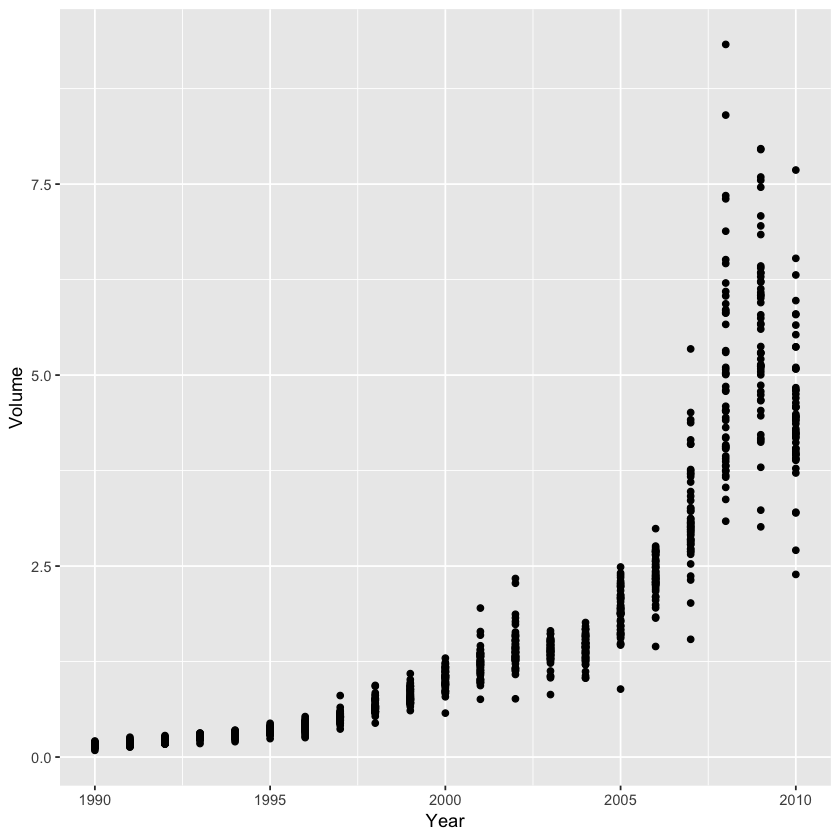

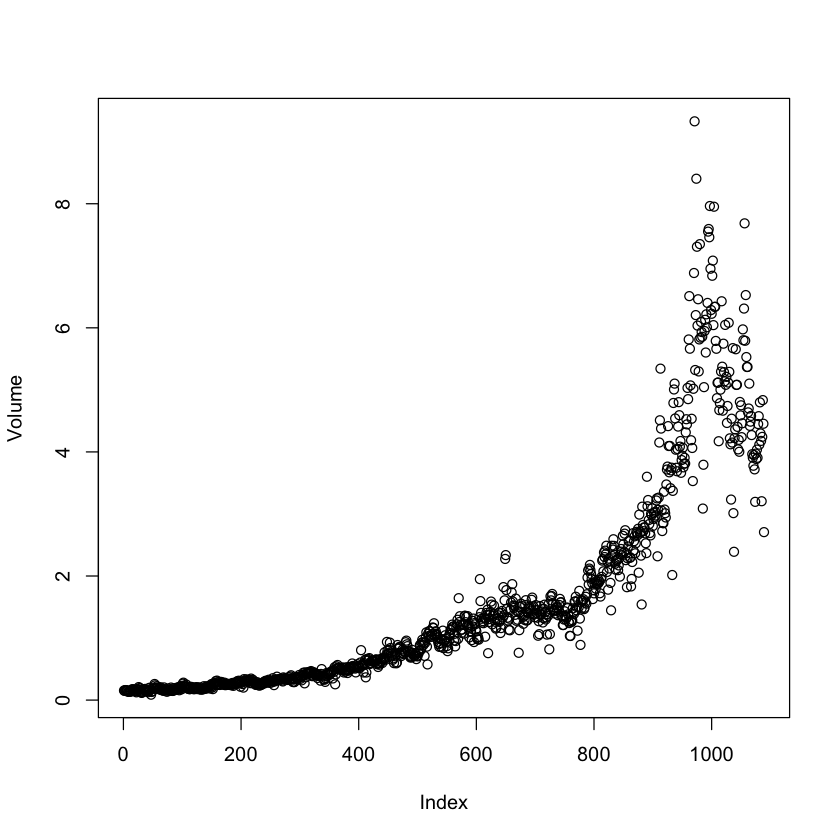

In [12]:
library(ggplot2)
attach(Weekly)
plot5 <- ggplot(data = Weekly, aes(Year, Volume)) +
geom_point()
plot5
plot(Volume)

In [7]:
install.packages("corrplot")
library(corrplot)


The downloaded binary packages are in
	/var/folders/3d/xmp0cm0j5kvbh5pgrr2b6scw0000gn/T//Rtmp2ylKU1/downloaded_packages


corrplot 0.84 loaded


In [8]:
q5a <- subset(Weekly, select = -c(Direction))
q5a

Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
1990,0.816,1.572,-3.936,-0.229,-3.484,0.1549760,-0.270
1990,-0.270,0.816,1.572,-3.936,-0.229,0.1485740,-2.576
1990,-2.576,-0.270,0.816,1.572,-3.936,0.1598375,3.514
1990,3.514,-2.576,-0.270,0.816,1.572,0.1616300,0.712
1990,0.712,3.514,-2.576,-0.270,0.816,0.1537280,1.178
1990,1.178,0.712,3.514,-2.576,-0.270,0.1544440,-1.372
1990,-1.372,1.178,0.712,3.514,-2.576,0.1517220,0.807
1990,0.807,-1.372,1.178,0.712,3.514,0.1323100,0.041
1990,0.041,0.807,-1.372,1.178,0.712,0.1439720,1.253
1990,1.253,0.041,0.807,-1.372,1.178,0.1336350,-2.678


In [9]:
q5a1 <- cor(q5a)

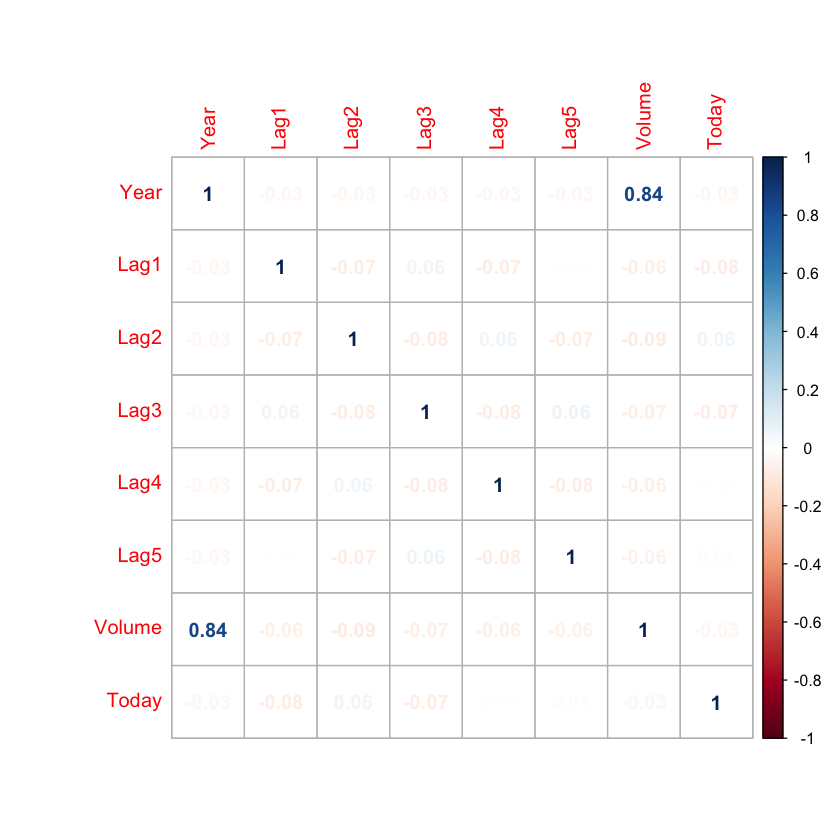

In [10]:
corrplot(q5a1, method = "number")

The only significant correlation is between volume and year, and the correlation is positive. This is expected based on the plot of volume against year shown above.

In [11]:
# (b)
lmweekly <- glm(Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + Volume, data = Weekly, family = binomial)
summary(lmweekly)
#Only statistically significant predictors are Lag2 based on this model. 


Call:
glm(formula = Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + 
    Volume, family = binomial, data = Weekly)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6949  -1.2565   0.9913   1.0849   1.4579  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept)  0.26686    0.08593   3.106   0.0019 **
Lag1        -0.04127    0.02641  -1.563   0.1181   
Lag2         0.05844    0.02686   2.175   0.0296 * 
Lag3        -0.01606    0.02666  -0.602   0.5469   
Lag4        -0.02779    0.02646  -1.050   0.2937   
Lag5        -0.01447    0.02638  -0.549   0.5833   
Volume      -0.02274    0.03690  -0.616   0.5377   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1496.2  on 1088  degrees of freedom
Residual deviance: 1486.4  on 1082  degrees of freedom
AIC: 1500.4

Number of Fisher Scoring iterations: 4


In [21]:
# (c) Compute a confusion matrix. 
q5c <- predict(lmweekly, type = "response")
predglm <- rep("Down", length(q5c))
predglm[q5c > 0.5] <- "Up"
table(predglm, Direction)

       Direction
predglm Down  Up
   Down   54  48
   Up    430 557

The confusion matrix is a way to evaluate the effectiveness of the binary classifier, by evaluating true/false positives and true/false negatives. In this case, the percentage of times when the classifier is correct more often when the market goes up, rather than when it goes down. When it goes down, it only predicts that it went down 54/(430+54) = or 11.2% of the time. When the market goes up, it correctly predicts this 557/(557+48) or 92.1% of the time. This can also be defined in terms of sensitivity and specificity.

In [20]:
# (d) Now fit logistic regression using training period from 1990 to 2008 with "Lag2" as only predictor.
# Compute a confusion matrix.
trainingperiod <- (Year < 2009)
WeeklyTrain <- Weekly[!trainingperiod, ]
DirectionTrain <- Direction[!trainingperiod]
q5d <- glm(Direction ~ Lag2, data = Weekly, family = binomial, subset = trainingperiod)
summary(q5d)
# Now make the confusion matrix using a prediction of the glm
q5dconfuse <- predict(q5d, WeeklyTrain, type = "response")
predglm2 <- rep("Down", length(q5dconfuse))
predglm2[q5dconfuse > 0.5] <- "Up"
table(predglm2, DirectionTrain)


Call:
glm(formula = Direction ~ Lag2, family = binomial, data = Weekly, 
    subset = trainingperiod)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.536  -1.264   1.021   1.091   1.368  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept)  0.20326    0.06428   3.162  0.00157 **
Lag2         0.05810    0.02870   2.024  0.04298 * 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1354.7  on 984  degrees of freedom
Residual deviance: 1350.5  on 983  degrees of freedom
AIC: 1354.5

Number of Fisher Scoring iterations: 4


        DirectionTrain
predglm2 Down Up
    Down    9  5
    Up     34 56

In this case, the overall percent correct for the logistic regression model is 62.5%. When the market is going up, the model makes a correct prediction 91.8% of the time, while when the market is going down, it predicts this correctly only 29.9% of the time.

In [27]:
install.packages("MASS")
library(MASS) #this has the lda function (LDA is not built into R)


The downloaded binary packages are in
	/var/folders/3d/xmp0cm0j5kvbh5pgrr2b6scw0000gn/T//Rtmp2ylKU1/downloaded_packages


In [32]:
# (e) Repeat (d) but using LDA.
q5LDA <- lda(Direction ~ Lag2, data = Weekly, subset = trainingperiod)
summary(q5LDA)
q5LDA #this gives us the real summary!

        Length Class  Mode     
prior   2      -none- numeric  
counts  2      -none- numeric  
means   2      -none- numeric  
scaling 1      -none- numeric  
lev     2      -none- character
svd     1      -none- numeric  
N       1      -none- numeric  
call    4      -none- call     
terms   3      terms  call     
xlevels 0      -none- list     

Call:
lda(Direction ~ Lag2, data = Weekly, subset = trainingperiod)

Prior probabilities of groups:
     Down        Up 
0.4477157 0.5522843 

Group means:
            Lag2
Down -0.03568254
Up    0.26036581

Coefficients of linear discriminants:
           LD1
Lag2 0.4414162

In [28]:
predictionLDA <- predict(q5LDA, WeeklyTrain)
table(predictionLDA$class, DirectionTrain)

      DirectionTrain
       Down Up
  Down    9  5
  Up     34 56

The percentage of correct predictions overall is 62.5%, but differs when the market is going up or going down. When the market is going up, it is correct 56/(56+5) or 91.8% of the time. When the market is going down, it is only correct 9/(9+34) or 20.9% of the time. This is similar to the logistic regression model findings.

In [30]:
# (f) Repeat using QDA rather than LDA. Thankfully the qda is part of the MASS package too.
q5QDA <- qda(Direction ~ Lag2, data = Weekly, subset = trainingperiod)
q5QDA

Call:
qda(Direction ~ Lag2, data = Weekly, subset = trainingperiod)

Prior probabilities of groups:
     Down        Up 
0.4477157 0.5522843 

Group means:
            Lag2
Down -0.03568254
Up    0.26036581

In [31]:
predictionQDA <- predict(q5QDA, WeeklyTrain)
table(predictionQDA$class, DirectionTrain)

      DirectionTrain
       Down Up
  Down    0  0
  Up     43 61

Basically the QDA model chooses "Up" all the time, which means it's 100% correct when the model goes up, but 0% right when the model goes down. Interestingly, this still makes it right 58.7% of the time overall.

In [33]:
# (g) Repeat using KNN with K = 1
install.packages("class")


The downloaded binary packages are in
	/var/folders/3d/xmp0cm0j5kvbh5pgrr2b6scw0000gn/T//Rtmp2ylKU1/downloaded_packages


In [35]:
library(class) #ISLR's recommended package for KNN. See page 164 in book
trainset <- as.matrix(Lag2[trainingperiod])
testset <- as.matrix(Lag2[!trainingperiod])
traindirection = Direction[trainingperiod]
set.seed(1) #ensures replicability
predKNN <- knn(trainset, testset, traindirection, k = 1)
table(predKNN, DirectionTrain)

       DirectionTrain
predKNN Down Up
   Down   21 30
   Up     22 31

The correct percentage is 50% ((31+21)/(31+21+30+22)). In this case, if the market goes up, it is right 50.8% of the time (31/(31+30)) and if it goes down, it is right 48.8% of the time. 

##### (h) Which method provides the best results on the data?

We'd want to lowest test error rate, otherwise known as (1 - %correct). So it could also be said that we want whatever shows the highest overall percent correct prediction. The LDA and logistic regression model are comparable and have the highest % correct.

In [48]:
# (i) Experiment with different combinations of predictors and possible transformations. Also experiment with the K
# values for the KNN classifier.

glm3 <- glm(Direction ~ Lag3:Lag2, data = Weekly, family = binomial, subset = trainingperiod)
probability3 <- predict(glm3, WeeklyTrain, type = "response")
predictglm3 <- rep("Down", length(probability3))
predictglm3[probability3 > 0.5] <- "Up"
table(predictglm3, DirectionTrain) # can't quite figure out why it isn't giving me the down row for predictglm3...
mean(predictglm3 == DirectionTrain) # easy way to find the % correct

           DirectionTrain
predictglm3 Down Up
         Up   43 61

[1] 0.5865385

In [51]:
predictionknn <- knn(trainset, testset, traindirection, k = 10)
mean(predictionknn == DirectionTrain)

[1] 0.5769231

In [52]:
predictionknn <- knn(trainset, testset, traindirection, k = 100)
mean(predictionknn == DirectionTrain)

[1] 0.5576923

In [58]:
q5QDA2 <- qda(Direction ~ Lag2 + sqrt(abs(Lag2)), data = Weekly, subset = trainingperiod)
predictionQDA2 <- predict(q5QDA2, WeeklyTrain)
mean(predictionQDA2$class == DirectionTrain)

[1] 0.5769231

All these variations do not reach the percent correct above 60%, so the LDA and logistic regression are still better performing models.

---


6. In this problem, you will develop a model to predict whether a given car gets high or low gas mileage based on the Auto data set.

(a) Create a binary variable, mpg01, that contains a 1 if mpg contains a value above its median, and a 0 if mpg contains a value below its median. You can compute the median using the median() function. Note you may find it helpful to use the data.frame() function to create a single data set containing both mpg01 and the other Auto variables.

(b) Explore the data graphically in order to investigate the associ- ation between mpg01 and the other features. Which of the other features seem most likely to be useful in predicting mpg01? Scatterplots and boxplots may be useful tools to answer this ques- tion. Describe your findings.

(c) Split the data into a training set and a test set.

(d) Perform LDA on the training data in order to predict mpg01 using the variables that seemed most associated with mpg01 in (b). What is the test error of the model obtained?

(e) Perform QDA on the training data in order to predict mpg01 using the variables that seemed most associated with mpg01 in (b). What is the test error of the model obtained?

(f) Perform logistic regression on the training data in order to pre- dict mpg01 using the variables that seemed most associated with mpg01 in (b). What is the test error of the model obtained?

(g) Perform KNN on the training data, with several values of K, in order to predict mpg01. Use only the variables that seemed most associated with mpg01 in (b). What test errors do you obtain? Which value of K seems to perform the best on this data set?

In [77]:
# ------------------
# Exercize 6
# ------------------

library(ISLR)
attach(Auto)
mpg01 <- rep(0, length(mpg))
mpg01[mpg > median(mpg)] <- 1
AutoB <- data.frame(Auto, mpg01)
AutoB

The following objects are masked from Auto (pos = 4):

    acceleration, cylinders, displacement, horsepower, mpg, name,
    origin, weight, year

The following objects are masked from Auto (pos = 5):

    acceleration, cylinders, displacement, horsepower, mpg, name,
    origin, weight, year

The following object is masked from package:ggplot2:

    mpg



,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,mpg01
1,18,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu,0
2,15,8,350,165,3693,11.5,70,1,buick skylark 320,0
3,18,8,318,150,3436,11.0,70,1,plymouth satellite,0
4,16,8,304,150,3433,12.0,70,1,amc rebel sst,0
5,17,8,302,140,3449,10.5,70,1,ford torino,0
6,15,8,429,198,4341,10.0,70,1,ford galaxie 500,0
7,14,8,454,220,4354,9.0,70,1,chevrolet impala,0
8,14,8,440,215,4312,8.5,70,1,plymouth fury iii,0
9,14,8,455,225,4425,10.0,70,1,pontiac catalina,0
10,15,8,390,190,3850,8.5,70,1,amc ambassador dpl,0


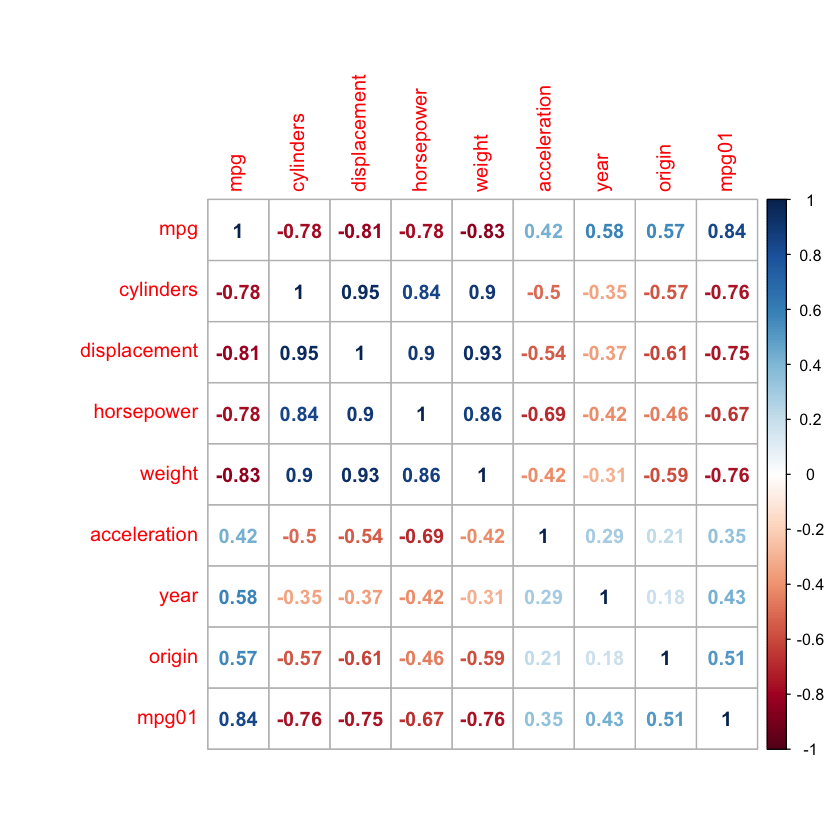

In [78]:
AutoCor <- cor(AutoB[,-9]) #have to subtract
corrplot(AutoCor, method = "number")

Lots of very strong correlations in this dataset!

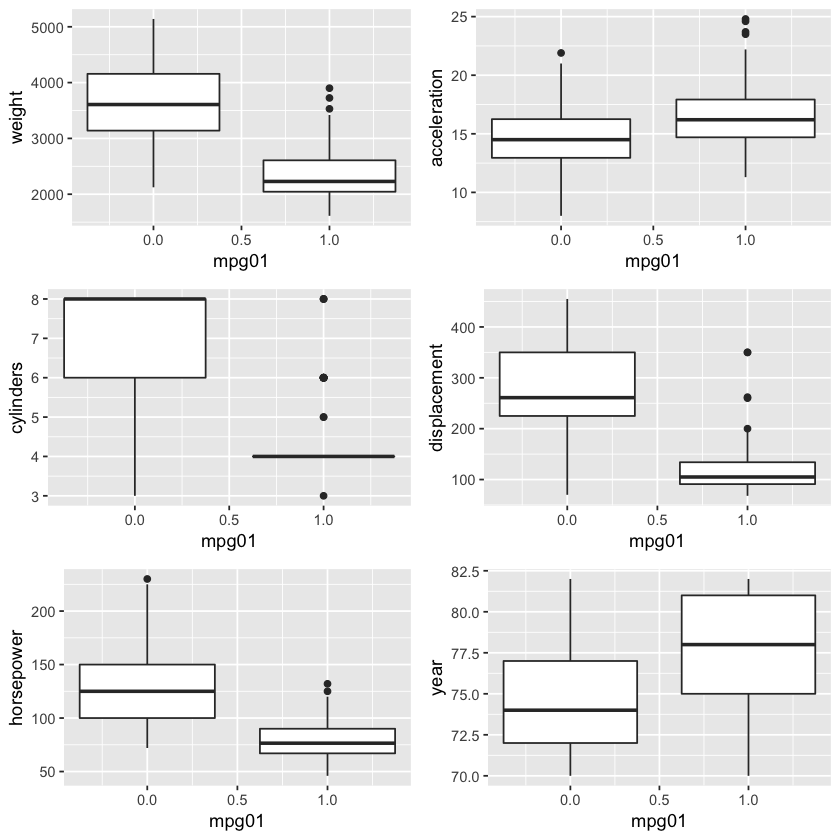

In [79]:
library(gridExtra)
Aonwt <- ggplot(AutoB, aes(group = mpg1, x = mpg01, y = weight)) +
geom_boxplot()
Aonac <- ggplot(AutoB, aes(group = mpg1, x = mpg01, y = acceleration)) +
geom_boxplot()
Aoncy <- ggplot(AutoB, aes(group = mpg1, x = mpg01, y = cylinders)) +
geom_boxplot()
Aondp <- ggplot(AutoB, aes(group = mpg1, x = mpg01, y = displacement)) +
geom_boxplot()
Aonhp <- ggplot(AutoB, aes(group = mpg1, x = mpg01, y = horsepower)) +
geom_boxplot()
Aonyr <- ggplot(AutoB, aes(group = mpg1, x = mpg01, y = year)) +
geom_boxplot()
grid.arrange(Aonwt, Aonac, Aoncy, Aondp, Aonhp, Aonyr, ncol = 2)

Looking at these graphs and the correlation plots, it looks like there is an association between MPG (the binary version), cylinders, weight, horsepower, and displacement.

In [84]:
# (c) Split the data into training and test set
help('%%')
traindivide <- (year %% 2 == 0)
trainauto <- Auto[traindivide, ]
Auto.test <- Auto[!traindivide, ]
mpg01test <- mpg1[!traindivide]

In [85]:
# (d) Perform LDA on training data in order to predict the variables most associated with mpg01
ldaAuto <- lda(mpg01 ~ cylinders + weight + displacement + horsepower, data = AutoB, subset = traindivide)
ldaAuto

Call:
lda(mpg01 ~ cylinders + weight + displacement + horsepower, data = AutoB, 
    subset = traindivide)

Prior probabilities of groups:
        0         1 
0.4571429 0.5428571 

Group means:
  cylinders   weight displacement horsepower
0  6.812500 3604.823     271.7396  133.14583
1  4.070175 2314.763     111.6623   77.92105

Coefficients of linear discriminants:
                       LD1
cylinders    -0.6741402638
weight       -0.0011465750
displacement  0.0004481325
horsepower    0.0059035377

In [88]:
predictldaAuto <- predict(ldaAuto, Auto.test)
table(predictldaAuto$class, mpg01test)

   mpg01test
     0  1
  0 86  9
  1 14 73

In [92]:
1 - (mean(predictldaAuto$class == mpg01test)) # need to take 1 - (mean) in order to get the test eerror rate!

[1] 0.1263736

In [95]:
# (e) Perform QDA on training set; similar to D but with QDA instead
qdaAuto <- qda(mpg01 ~ cylinders + weight + displacement + horsepower, data = AutoB, subset = traindivide)
qdaAuto

Call:
qda(mpg01 ~ cylinders + weight + displacement + horsepower, data = AutoB, 
    subset = traindivide)

Prior probabilities of groups:
        0         1 
0.4571429 0.5428571 

Group means:
  cylinders   weight displacement horsepower
0  6.812500 3604.823     271.7396  133.14583
1  4.070175 2314.763     111.6623   77.92105

In [96]:
predictqdaAuto <- predict(qdaAuto, Auto.test)
table(predictqdaAuto$class, mpg01test)

   mpg01test
     0  1
  0 89 13
  1 11 69

In [97]:
1 - (mean(predictqdaAuto$class == mpg01test))

[1] 0.1318681

In [98]:
# (f) Perform logistic regression on the training data in order to predict mpg01 using variables most associated.
# basically the same as above but with logistic regression
logregAuto <- glm(mpg01 ~ cylinders + weight + displacement + horsepower, data = AutoB, family = binomial, subset = traindivide)
summary(logregAuto)


Call:
glm(formula = mpg01 ~ cylinders + weight + displacement + horsepower, 
    family = binomial, data = AutoB, subset = traindivide)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.48027  -0.03413   0.10583   0.29634   2.57584  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)  17.658730   3.409012   5.180 2.22e-07 ***
cylinders    -1.028032   0.653607  -1.573   0.1158    
weight       -0.002922   0.001137  -2.569   0.0102 *  
displacement  0.002462   0.015030   0.164   0.8699    
horsepower   -0.050611   0.025209  -2.008   0.0447 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 289.58  on 209  degrees of freedom
Residual deviance:  83.24  on 205  degrees of freedom
AIC: 93.24

Number of Fisher Scoring iterations: 7


In [101]:
probAuto <- predict(logregAuto, Auto.test, type = "response")
predictglmAuto <- rep(0, length(probAuto))
predictglmAuto[probAuto > 0.5] <- 1
table(predictglmAuto, mpg01test)

              mpg01test
predictglmAuto  0  1
             0 89 11
             1 11 71

In [109]:
1 - mean(predictglmAuto == mpg01test)

[1] 0.1208791

In [108]:
#can also write as:
mean(predictglmAuto != mpg01test)

[1] 0.1208791

In [124]:
# (g) Perform KNN on training data, with several values of K, with same predictors.
trainsetAuto <- cbind(cylinders, weight, displacement, horsepower)[traindivide, ] #need to add the ,_ at the end
#otherwise you'll get an error about the length of these objects
testsetAuto <- cbind(cylinders, weight, displacement, horsepower)[!traindivide, ]
train.mpg01 <- mpg01[traindivide]
set.seed(1)
predictKNNAuto <- knn(trainsetAuto, testsetAuto, train.mpg01, k = 1)
table(predictKNNAuto, mpg01test)

              mpg01test
predictKNNAuto  0  1
             0 83 11
             1 17 71

In [125]:
1 - mean(predictKNNAuto == mpg01test)

[1] 0.1538462

In [126]:
predictKNNAuto10 <- knn(trainsetAuto, testsetAuto, train.mpg01, k = 10)
table(predictKNNAuto10, mpg01test)
1 - mean(predictKNNAuto10 == mpg01test)

                mpg01test
predictKNNAuto10  0  1
               0 77  7
               1 23 75

[1] 0.1648352

In [127]:
predictKNNAuto100 <- knn(trainsetAuto, testsetAuto, train.mpg01, k = 100)
table(predictKNNAuto100, mpg01test)
1 - mean(predictKNNAuto100 == mpg01test)

                 mpg01test
predictKNNAuto100  0  1
                0 81  7
                1 19 75

[1] 0.1428571

The test error rate is the smallest for k = 100, so this is the best of the KNN possibilities.